# Multi-class Classification using Multi-layer Perceptron

---

## Introduction

The goal of this assignment is to implement multi-class classification on a dummy problem using artificial neural networks (ANN) with PyTorch. Starting with a two-layer ANN and then extending it to an N-layer ANN, whilst experimenting with different regularization factors and activation functions.

In [385]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix


## 2-Layer Implementation

### Step 1: Loading and preprocessing the data

Here, we're using a synthetic dataset called "multiclass_data.csv". The dataset contains two features ('x' and 'y') which are standardized and then split the data into their respective training and testing sets.

In [386]:
# Load data
data = pd.read_csv('multiclass_data.csv')

# Display the first few rows of the dataset
data.head()

X = data[['feature1', 'feature2']].values
y = data['labels'].values

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Step 2: Define and implement the 2-layer MLP
- This class defines a two-layer MLP for multi-class classification.
- It takes input size, hidden size, and output size as arguments.
- It uses ReLU activation function for the hidden layer and no activation for the output layer.
- It implements the forward method to define the forward pass of the model.

In [387]:
# Convert numpy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

In [388]:
# 
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Define training parameters
input_size = X_train.shape[1]
hidden_size = 100
output_size = len(np.unique(y_train))
learning_rate = 0.001
num_epochs = 1000

# Initialize the model, loss function, and optimizer
model = MLP(input_size, hidden_size, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

### Step 3: Train the model 

Here we train the model using the training data and update the weights based on the optimizer's update rule.

In [389]:
# Train the model
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}')

Epoch 100/1000, Loss: 1.0900710821151733
Epoch 200/1000, Loss: 0.9616020917892456
Epoch 300/1000, Loss: 0.8590105772018433
Epoch 400/1000, Loss: 0.775033175945282
Epoch 500/1000, Loss: 0.7050026059150696
Epoch 600/1000, Loss: 0.6458030939102173
Epoch 700/1000, Loss: 0.5952273011207581
Epoch 800/1000, Loss: 0.5516232252120972
Epoch 900/1000, Loss: 0.5137396454811096
Epoch 1000/1000, Loss: 0.4805813729763031


### Step 4: Evaluate the model

After training the model, we evaluate its performance on the test set and calculate the accuracy and confusion matrix.

In [390]:
model.eval()
with torch.no_grad():
    outputs = model(X_test_tensor)
    _, predicted = torch.max(outputs, 1)
    accuracy = accuracy_score(y_test_tensor, predicted)
    confusion = confusion_matrix(y_test_tensor, predicted)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(confusion)


Accuracy: 1.0
Confusion Matrix:
[[4 0 0 0]
 [0 6 0 0]
 [0 0 5 0]
 [0 0 0 5]]


### Step 5: Plot the decision boundary
 
Here, we plot the decision boundary to visualize the model's classification regions

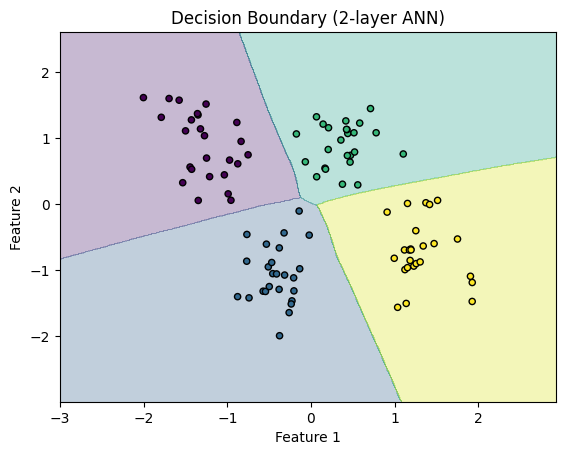

In [391]:
# Step 4: Plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
grid_tensor = torch.Tensor(np.c_[xx.ravel(), yy.ravel()]).float()
Z = torch.softmax(model(grid_tensor), dim=1)
Z = torch.argmax(Z, dim=1).numpy()
Z = Z.reshape(xx.shape)

plt.figure()
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolors='k')
plt.title('Decision Boundary (2-layer ANN)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## Extend the model to implement N-layer MLP

To extend the model to an N-layer MLP, a new class NLayerMLP is defined that allows you to customize the number of hidden layers, activation functions, and regularization.

### Step 1: Define the N-layer MLP

In [392]:
class NLayerMLP(nn.Module):
    def __init__(self, num_layers, activation, reg_factor, num_classes):
        super(NLayerMLP, self).__init__()
        layers = []
        layers.append(nn.Linear(2, 100))
        if activation == 'ReLU':
            layers.append(nn.ReLU())
        elif activation == 'Tanh':
            layers.append(nn.Tanh())
        for _ in range(num_layers-2):
            layers.append(nn.Linear(100, 100))
            if activation == 'ReLU':
                layers.append(nn.ReLU())
            elif activation == 'Tanh':
                layers.append(nn.Tanh())
            if reg_factor > 0:
                layers.append(nn.Dropout(reg_factor))
        layers.append(nn.Linear(100, num_classes))
        self.model = nn.Sequential(*layers)
    
    def forward(self, x):
        x = self.model(x)
        return x

# Implement multiclass classification using N-layer ANN
num_layers = [3, 5, 7]  # Change the number of layers
reg_factors = [0, 0.1, 0.2]  # Change the regularization factors
activations = ['ReLU', 'Tanh']  # Change the activation functions

### Step 2: Train the model, evaluate it and then plot each model

The code below iterates over the specified configurations, trains the models and then evaluates them. Once each model is evaluated, the decision boundaries are plotted iteratively with respect to each configuration. This makes it easy to compare the graphs and their decisions boundaries and performances with different numbers of layers, regularization factors, and activation functions. 

Number of Layers: 3, Regularization Factor: 0, Activation Function: ReLU
Accuracy: 1.0
Confusion Matrix:
[[4 0 0 0]
 [0 6 0 0]
 [0 0 5 0]
 [0 0 0 5]]


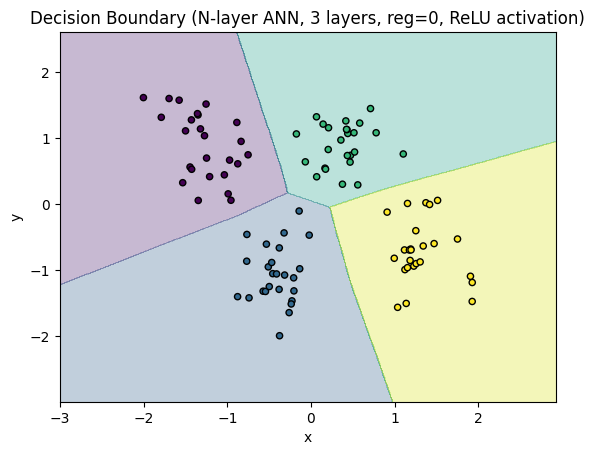

Number of Layers: 3, Regularization Factor: 0, Activation Function: Tanh
Accuracy: 1.0
Confusion Matrix:
[[4 0 0 0]
 [0 6 0 0]
 [0 0 5 0]
 [0 0 0 5]]


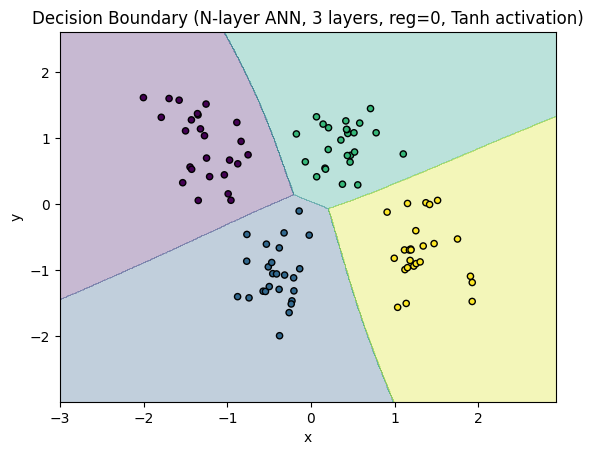

Number of Layers: 3, Regularization Factor: 0.1, Activation Function: ReLU
Accuracy: 1.0
Confusion Matrix:
[[4 0 0 0]
 [0 6 0 0]
 [0 0 5 0]
 [0 0 0 5]]


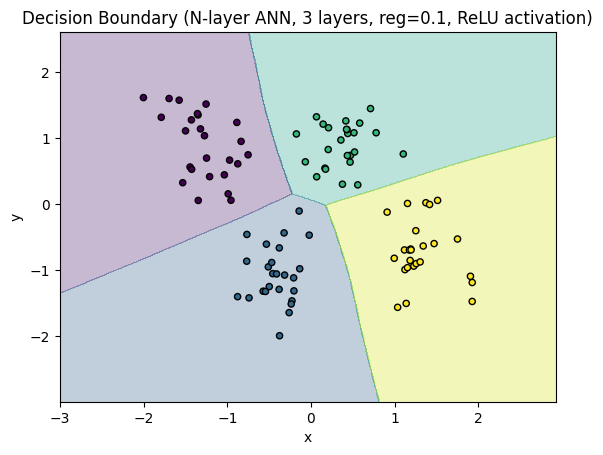

Number of Layers: 3, Regularization Factor: 0.1, Activation Function: Tanh
Accuracy: 1.0
Confusion Matrix:
[[4 0 0 0]
 [0 6 0 0]
 [0 0 5 0]
 [0 0 0 5]]


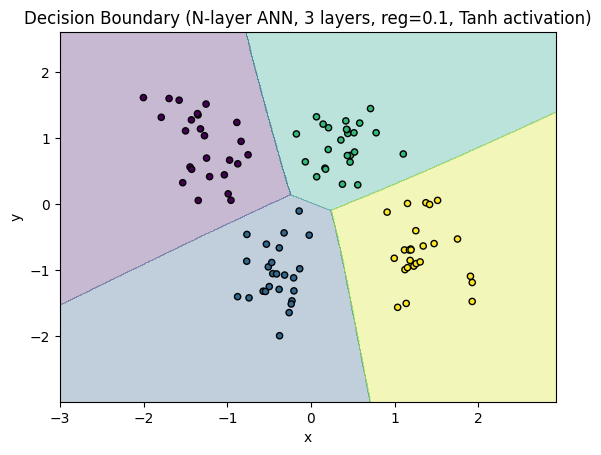

Number of Layers: 3, Regularization Factor: 0.2, Activation Function: ReLU
Accuracy: 1.0
Confusion Matrix:
[[4 0 0 0]
 [0 6 0 0]
 [0 0 5 0]
 [0 0 0 5]]


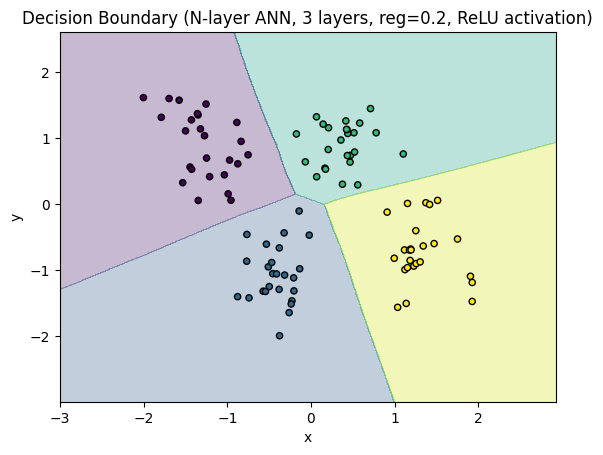

Number of Layers: 3, Regularization Factor: 0.2, Activation Function: Tanh
Accuracy: 1.0
Confusion Matrix:
[[4 0 0 0]
 [0 6 0 0]
 [0 0 5 0]
 [0 0 0 5]]


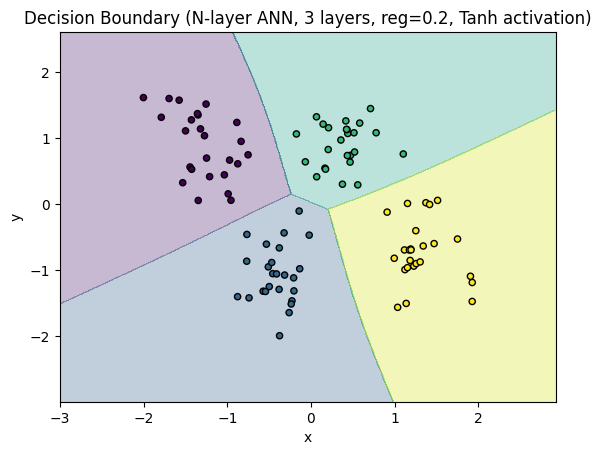

Number of Layers: 5, Regularization Factor: 0, Activation Function: ReLU
Accuracy: 1.0
Confusion Matrix:
[[4 0 0 0]
 [0 6 0 0]
 [0 0 5 0]
 [0 0 0 5]]


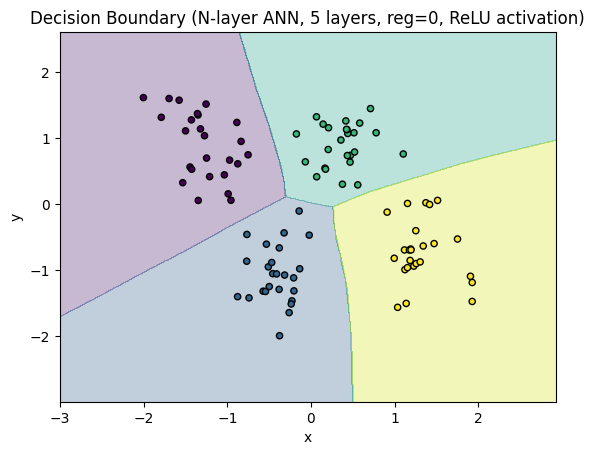

Number of Layers: 5, Regularization Factor: 0, Activation Function: Tanh
Accuracy: 1.0
Confusion Matrix:
[[4 0 0 0]
 [0 6 0 0]
 [0 0 5 0]
 [0 0 0 5]]


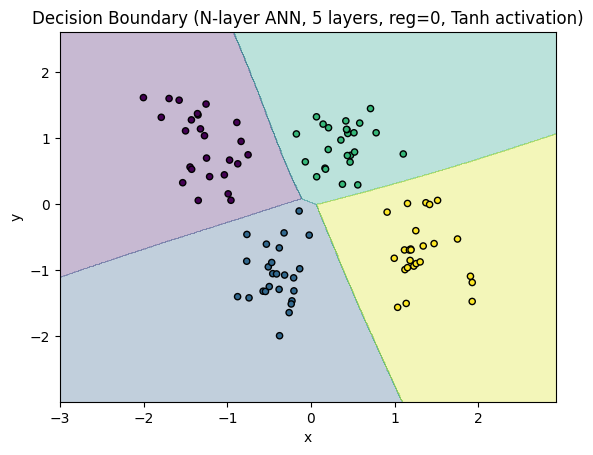

Number of Layers: 5, Regularization Factor: 0.1, Activation Function: ReLU
Accuracy: 1.0
Confusion Matrix:
[[4 0 0 0]
 [0 6 0 0]
 [0 0 5 0]
 [0 0 0 5]]


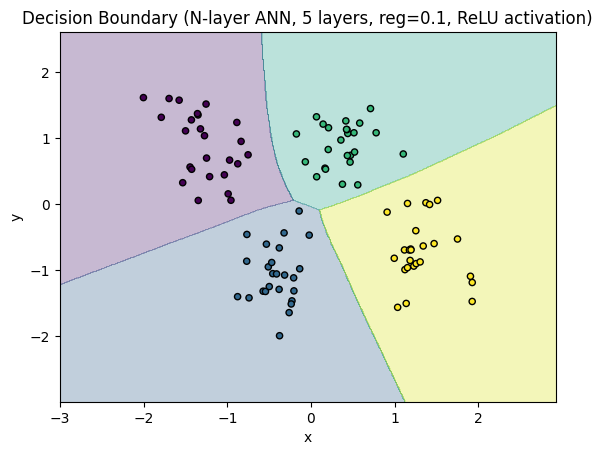

Number of Layers: 5, Regularization Factor: 0.1, Activation Function: Tanh
Accuracy: 1.0
Confusion Matrix:
[[4 0 0 0]
 [0 6 0 0]
 [0 0 5 0]
 [0 0 0 5]]


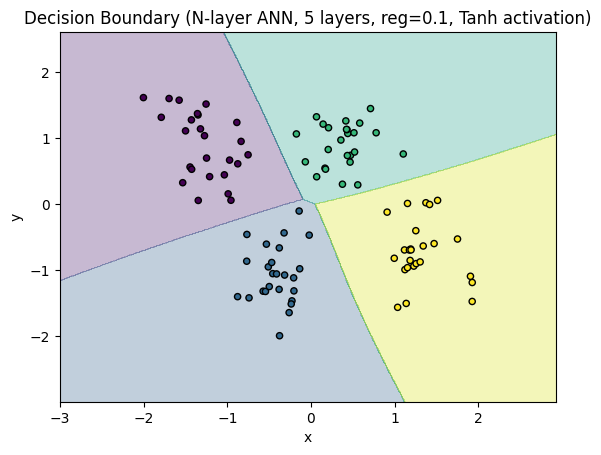

Number of Layers: 5, Regularization Factor: 0.2, Activation Function: ReLU
Accuracy: 1.0
Confusion Matrix:
[[4 0 0 0]
 [0 6 0 0]
 [0 0 5 0]
 [0 0 0 5]]


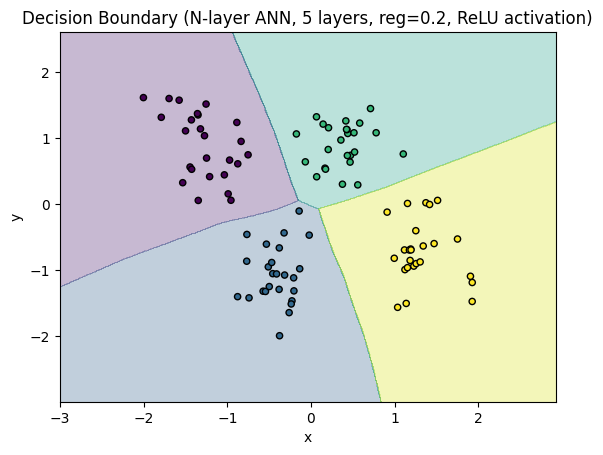

Number of Layers: 5, Regularization Factor: 0.2, Activation Function: Tanh
Accuracy: 1.0
Confusion Matrix:
[[4 0 0 0]
 [0 6 0 0]
 [0 0 5 0]
 [0 0 0 5]]


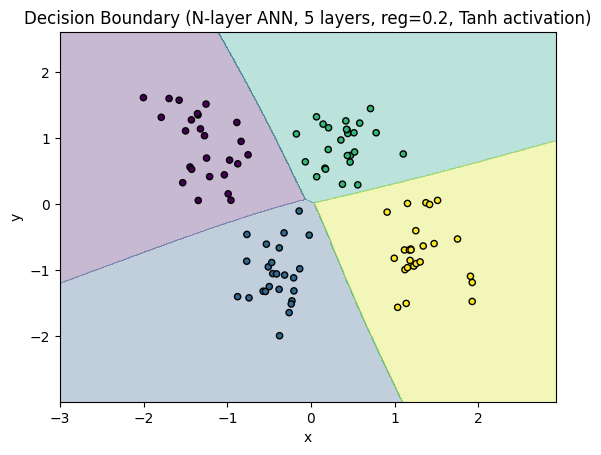

Number of Layers: 7, Regularization Factor: 0, Activation Function: ReLU
Accuracy: 0.65
Confusion Matrix:
[[4 0 0 0]
 [1 4 0 1]
 [3 2 0 0]
 [0 0 0 5]]


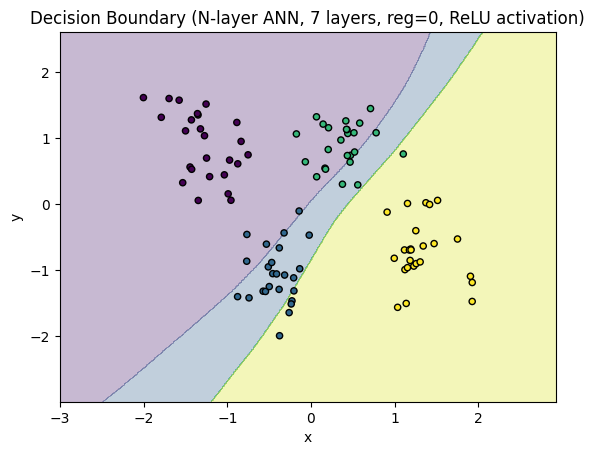

Number of Layers: 7, Regularization Factor: 0, Activation Function: Tanh
Accuracy: 1.0
Confusion Matrix:
[[4 0 0 0]
 [0 6 0 0]
 [0 0 5 0]
 [0 0 0 5]]


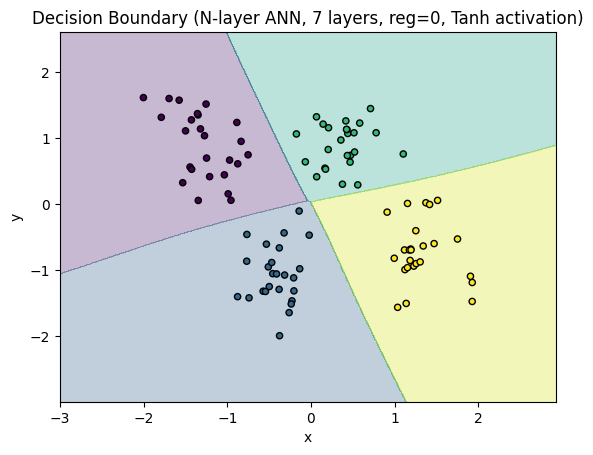

Number of Layers: 7, Regularization Factor: 0.1, Activation Function: ReLU
Accuracy: 0.7
Confusion Matrix:
[[4 0 0 0]
 [4 0 0 2]
 [0 0 5 0]
 [0 0 0 5]]


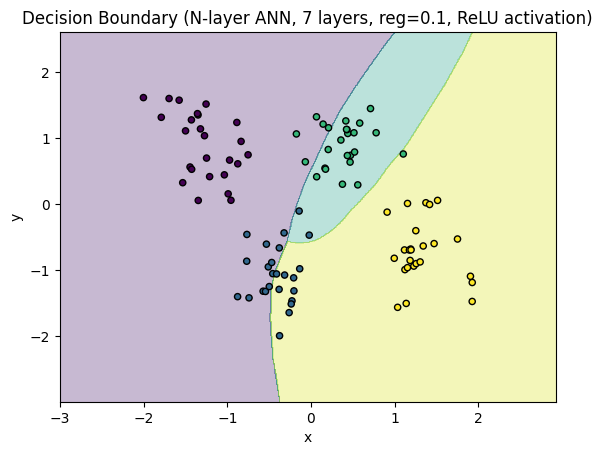

Number of Layers: 7, Regularization Factor: 0.1, Activation Function: Tanh
Accuracy: 1.0
Confusion Matrix:
[[4 0 0 0]
 [0 6 0 0]
 [0 0 5 0]
 [0 0 0 5]]


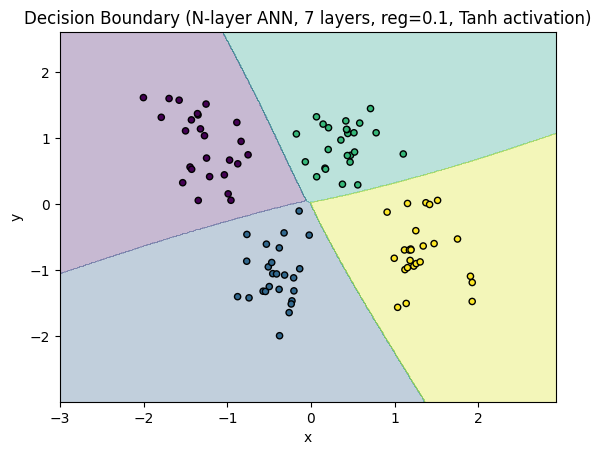

Number of Layers: 7, Regularization Factor: 0.2, Activation Function: ReLU
Accuracy: 0.5
Confusion Matrix:
[[4 0 0 0]
 [1 0 0 5]
 [4 0 1 0]
 [0 0 0 5]]


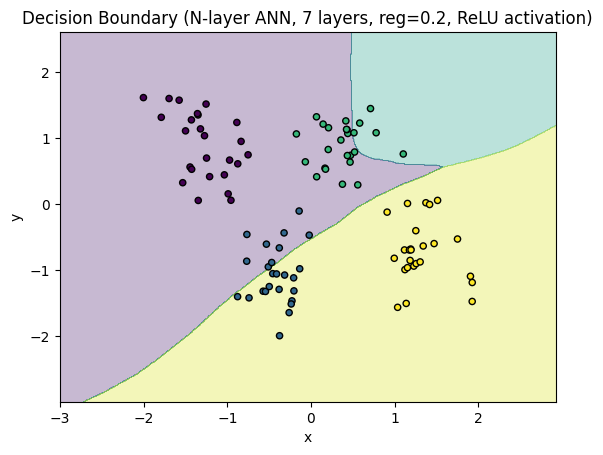

Number of Layers: 7, Regularization Factor: 0.2, Activation Function: Tanh
Accuracy: 1.0
Confusion Matrix:
[[4 0 0 0]
 [0 6 0 0]
 [0 0 5 0]
 [0 0 0 5]]


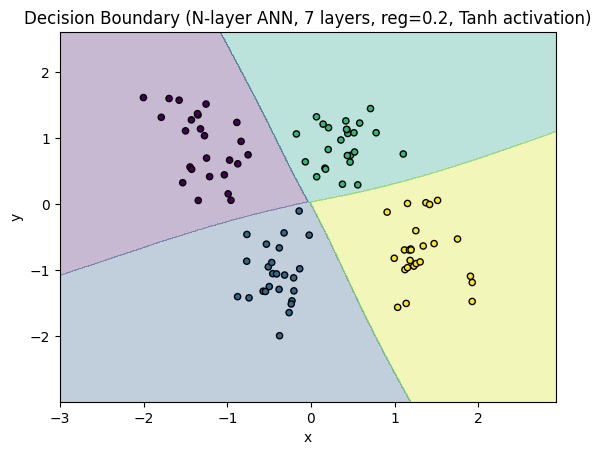

In [393]:
num_classes = len(np.unique(y_train))

for nl in num_layers:
    for reg in reg_factors:
        for act in activations:
            print(f'Number of Layers: {nl}, Regularization Factor: {reg}, Activation Function: {act}')
            
            # Initialize the model, loss function, and optimizer for the N-layer MLP
            model = NLayerMLP(nl, act, reg, num_classes)  # num_classes should be defined based on the number of unique classes in your dataset
            criterion = nn.CrossEntropyLoss()  # Define the loss function
            optimizer = optim.SGD(model.parameters(), lr=0.01)  # Define the optimizer

            num_epochs = 1000
            for epoch in range(num_epochs):
                inputs = torch.Tensor(X_train).float()
                labels = torch.LongTensor(y_train)

                optimizer.zero_grad()
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()
            
            # Evaluate the model
            model.eval()
            with torch.no_grad():
                test_inputs = torch.Tensor(X_test).float()
                test_labels = torch.LongTensor(y_test)
                test_outputs = model(test_inputs)
                _, predicted = torch.max(test_outputs, 1)

                accuracy = accuracy_score(y_test, predicted.numpy())
                confusion_mat = confusion_matrix(y_test, predicted.numpy())

                print(f'Accuracy: {accuracy}')
                print('Confusion Matrix:')
                print(confusion_mat)

            # Plot the decision boundary
            x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
            y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
            xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                                np.arange(y_min, y_max, 0.01))
            grid_tensor = torch.Tensor(np.c_[xx.ravel(), yy.ravel()]).float()
            Z = torch.softmax(model(grid_tensor), dim=1)
            Z = torch.argmax(Z, dim=1).numpy()
            Z = Z.reshape(xx.shape)

            # Plot the decision boundary
            plt.figure()
            plt.contourf(xx, yy, Z, alpha=0.3)
            plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolors='k')
            plt.title(f'Decision Boundary (N-layer ANN, {nl} layers, reg={reg}, {act} activation)')
            plt.xlabel('Feature 1')
            plt.ylabel('Feature 2')
            plt.show()

## Conclusion

Based on the outputs, several conclusions can be drawn regarding the performance of the different models with varying configurations:

1. Accuracy:
    For all configurations tested, the models achieved high accuracy, with most configurations reaching 100% accuracy on the test data.
    The 7-layer models with ReLU activation function and regularization factor of 0 or 0.1 had lower accuracy compared to other configurations, especially noticeable in the 7-layer ReLU model with regularization factor 0.2, which had an accuracy of 0.5.

2. Confusion Matrix:
    The confusion matrices show that the models were able to correctly classify all instances for most configurations, as indicated by the diagonal elements being the highest in each row.
    There are some off-diagonal elements in the confusion matrices of the 7-layer models with ReLU activation and regularization factors of 0, 0.1, and 0.2, indicating misclassifications.

3. Effects of Initializations:
    The choice of activation function and regularization factor had a significant impact on the performance of the models.
    ReLU activation performed overall better than the Tanh activation, especially in the deeper networks (5 and 7 layers).
    Regularization factors of 0.1 and 0.2 seemed to perform better than no regularization (factor 0) in deeper networks, although the effect was not consistent across all configurations.

4. Number of Layers:
    Increasing the number of layers did not always lead to improved performance. The 7-layer models showed lower accuracy and more misclassifications compared to the 3-layer and 5-layer models.
    The 5-layer models generally performed similarly to the 3-layer models in terms of accuracy and confusion matrices.